In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data Documentation


I will use "Breast Cancer Gene Expression Profiles (METABRIC)".
The first 31 columns of data contain clinical information including death status.
The next columns of the data contain gene's related information which includes both gene expressions and mutation information. (gene's mutation info columns have been marked with "\_mut" at the end of the names of the columns)
For more information please read the [data documentation](https://www.kaggle.com/datasets/raghadalharbi/breast-cancer-gene-expression-profiles-metabric).


### Data Loading

In [2]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("METABRIC_RNA_Mutation.csv")
df.head()

C:\Users\alireza dehghan\AppData\Local\Temp\ipykernel_10556\3219454361.py:2: DtypeWarning: Columns (678,688,690,692) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("METABRIC_RNA_Mutation.csv")


,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


### Data Preparation

Splitting data into three datasets:
<br>
1- clinical dataset
<br>
2- gene expressions dataset
<br>
3- gene mutation dataset.

#### Clinical Data

In [3]:
clinical_data = df.iloc[:, :31]

clinical_data.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


#### Gene Expression Data

In [4]:
gen_exp_data = df.iloc[:, 31:520]
gen_exp_data['patient_id'] = df['patient_id']
gen_exp_data['overall_survival'] = df['overall_survival']
gen_exp_data.head()

,brca1,brca2,palb2,pten,tp53,atm,cdh1,chek2,nbn,nf1,...,srd5a3,st7,star,tnk2,tulp4,ugt2b15,ugt2b17,ugt2b7,patient_id,overall_survival
0,-1.3990,-0.5738,-1.6217,1.4524,0.3504,1.1517,0.0348,0.1266,-0.8361,-0.8578,...,-1.6345,-0.2142,-0.5698,-1.1741,-1.4779,-0.5954,-0.8847,-0.3354,0,1
1,-1.3800,0.2777,-1.2154,0.5296,-0.0136,-0.2659,1.3594,0.7961,0.5419,-2.6059,...,0.4068,0.7634,0.0231,0.9121,-0.9538,-0.2264,0.5398,-0.8920,2,1
2,0.0670,-0.8426,0.2114,-0.3326,0.5141,-0.0803,1.1398,0.4187,-0.4030,-1.1305,...,0.8344,1.7227,0.4024,-3.7172,-1.5538,1.3701,-0.1078,0.3655,5,0
3,0.6744,-0.5428,-1.6592,0.6369,1.6708,-0.8880,1.2491,-1.1889,-0.4174,-0.6165,...,0.8228,0.6819,-0.1948,-2.3286,-0.9924,-0.3154,0.2320,-0.4828,6,1
4,1.2932,-0.9039,-0.7219,0.2168,0.3484,0.3897,0.9131,0.9356,0.7675,-0.2940,...,-1.0150,2.2961,0.1817,-0.1572,0.0427,5.0048,3.8476,1.3223,8,0


#### Gene Mutation Data

In [5]:
gen_mut_data = df.iloc[:, 520:]
gen_mut_data['patient_id'] = df['patient_id']
gen_mut_data['overall_survival'] = df['overall_survival']
gen_mut_data.head()

,pik3ca_mut,tp53_mut,muc16_mut,ahnak2_mut,kmt2c_mut,syne1_mut,gata3_mut,map3k1_mut,ahnak_mut,dnah11_mut,...,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut,patient_id,overall_survival
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,H178P,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
2,H1047R,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
3,E542K,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,6,1
4,0,S241F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,0


# Exploratory data analysis (EDA)

### Clinical data EDA


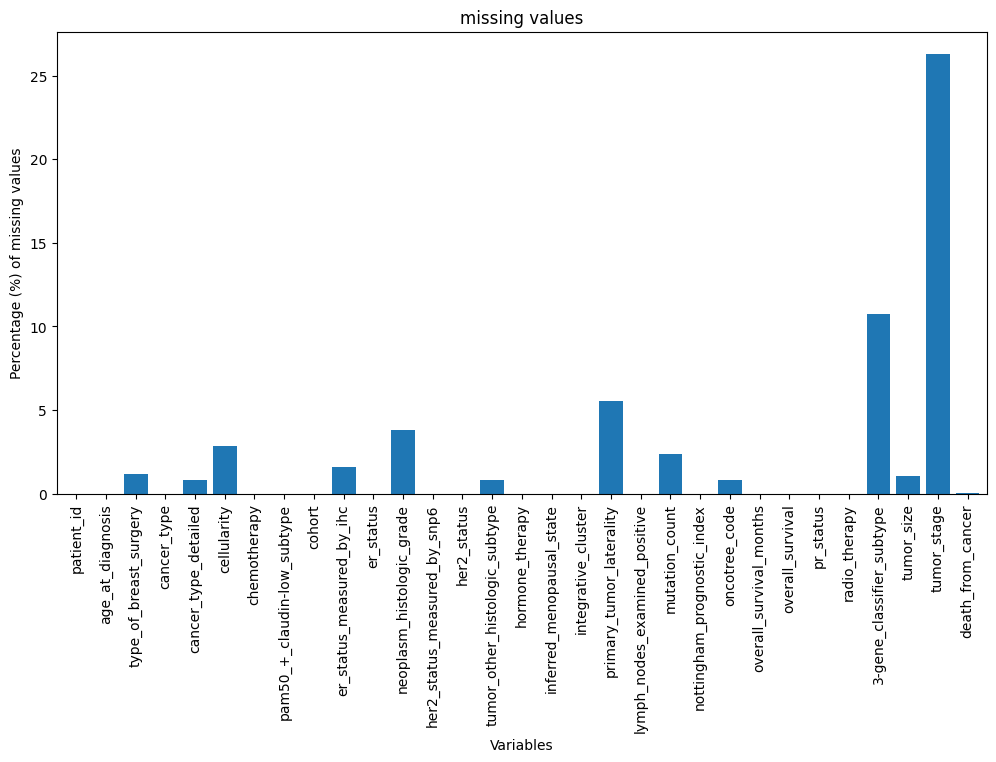

In [6]:
# Plot of missing value percentage

missing_values = clinical_data.isnull().sum() / clinical_data.shape[0] * 100

plt.figure(figsize=(12, 6)) 
missing_values.plot(kind='bar', width=0.8) 
plt.title('missing values')
plt.xlabel('Variables')
plt.ylabel('Percentage (%) of missing values')
plt.show()

#### Box plot of numerical columns


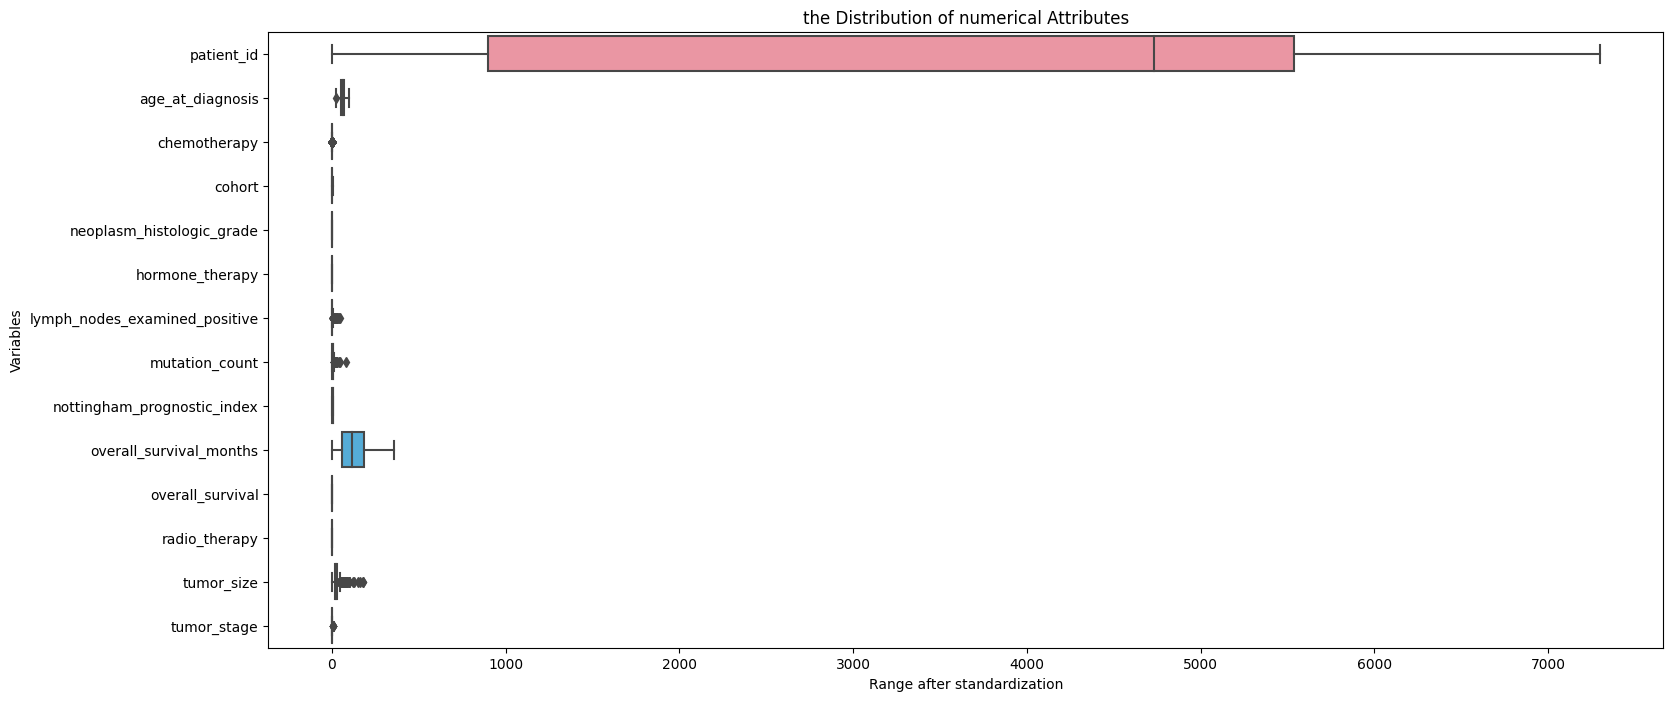

In [7]:
# function which return numerical dataframe
def numerical_df(df):
    num_df = df.select_dtypes(include=['float64', 'int64'])
    return num_df

plt.figure(figsize=(18, 8)) 
sns.boxplot(data=numerical_df(clinical_data), orient='h') 

plt.title('the Distribution of numerical Attributes')
plt.xlabel('Range after standardization')
plt.ylabel('Variables')

plt.show()

#### Target classes plots

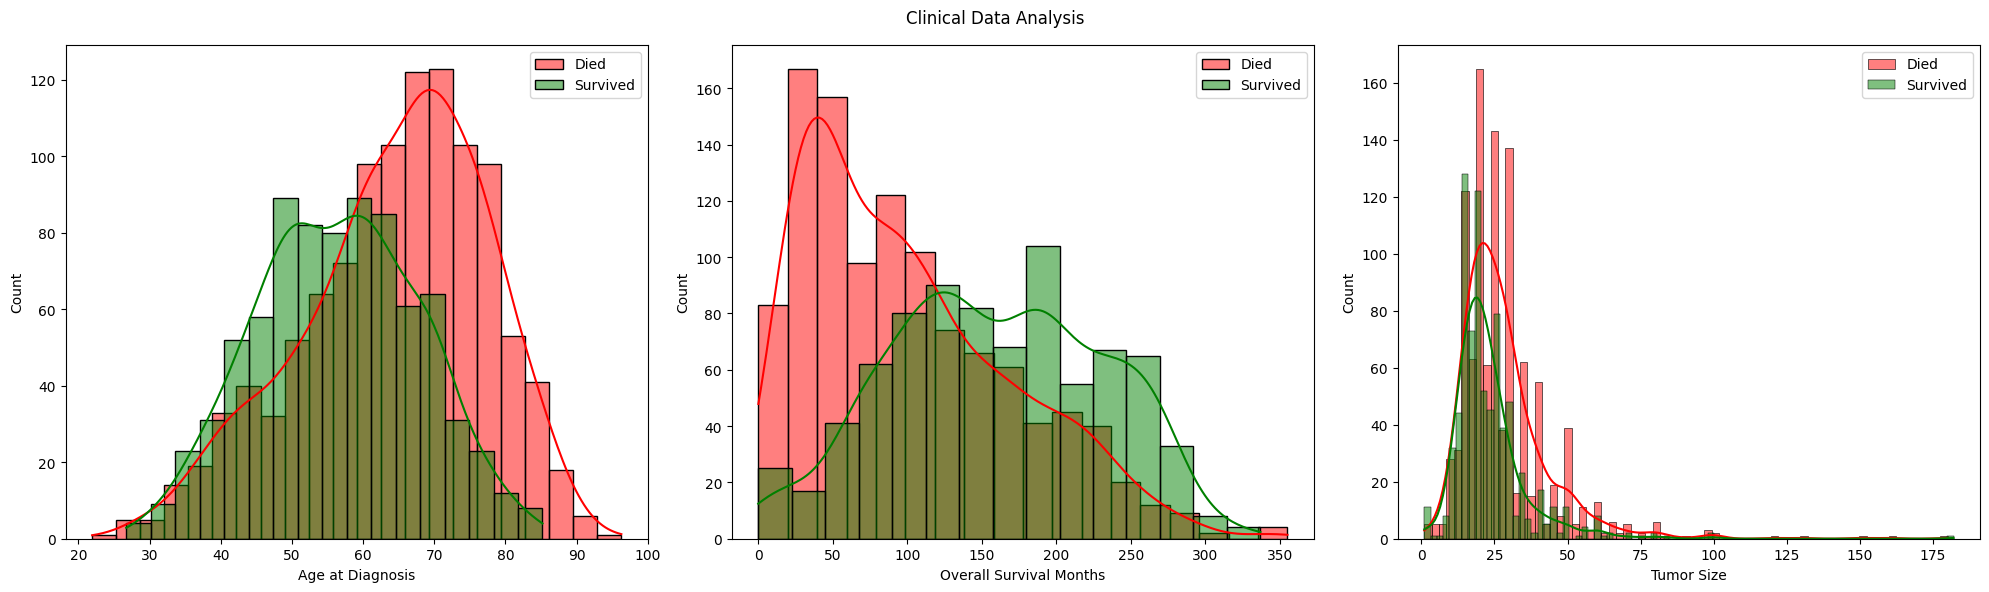

In [8]:
# Data based on survival status
died = clinical_data[df['overall_survival'] == 0]
survived = clinical_data[df['overall_survival'] == 1]


fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Histograms for age_at_diagnosis, overall_survival_months, and tumor_size based on survival status
sns.histplot(data=died, x='age_at_diagnosis', color='red', alpha=0.5, label='Died', bins="auto", kde=True, ax=axes[0])
sns.histplot(data=survived, x='age_at_diagnosis', color='green', alpha=0.5, label='Survived', bins="auto", kde=True, ax=axes[0])
axes[0].legend()

axes[0].set_xlabel('Age at Diagnosis')
axes[0].set_ylabel('Count')

sns.histplot(data=died, x='overall_survival_months', color='red', alpha=0.5, label='Died', bins="auto", kde=True, ax=axes[1])
sns.histplot(data=survived, x='overall_survival_months', color='green', alpha=0.5, label='Survived', bins="auto", kde=True, ax=axes[1])
axes[1].legend()

axes[1].set_xlabel('Overall Survival Months')
axes[1].set_ylabel('Count')

sns.histplot(data=died, x='tumor_size', color='red', alpha=0.5, label='Died', bins="auto", kde=True, ax=axes[2])
sns.histplot(data=survived, x='tumor_size', color='green', alpha=0.5, label='Survived', bins="auto", kde=True, ax=axes[2])
axes[2].legend()

axes[2].set_xlabel('Tumor Size')
axes[2].set_ylabel('Count')

fig.suptitle('Clinical Data Analysis')

# Adjust the spacing between subplots
plt.tight_layout()

plt.show()

#### Making dummy dataframe
To analyse data in the future it is needed to convert categorical values to dummy variables.

In [9]:
# Finding categorical variables
categorical_vars = clinical_data.select_dtypes(include=['object']).columns

# Converting categorical variables to dummy variables
clinical_data_dummy = pd.get_dummies(clinical_data, columns=categorical_vars, drop_first=True)

# Printing the columns list of the new dataset
print(clinical_data_dummy.columns.tolist())

['patient_id', 'age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage', 'type_of_breast_surgery_MASTECTOMY', 'cancer_type_Breast Sarcoma', 'cancer_type_detailed_Breast Invasive Ductal Carcinoma', 'cancer_type_detailed_Breast Invasive Lobular Carcinoma', 'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma', 'cancer_type_detailed_Breast Mixed Ductal and Lobular Carcinoma', 'cancer_type_detailed_Metaplastic Breast Cancer', 'cellularity_Low', 'cellularity_Moderate', 'pam50_+_claudin-low_subtype_Her2', 'pam50_+_claudin-low_subtype_LumA', 'pam50_+_claudin-low_subtype_LumB', 'pam50_+_claudin-low_subtype_NC', 'pam50_+_claudin-low_subtype_Normal', 'pam50_+_claudin-low_subtype_claudin-low', 'er_status_measured_by_ihc_Positve', 'er_status_Positive', 'her2_status_measured_by_snp